# Import required libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Load Raw Data File

In [ ]:
full_data = pd.read_csv('/content/cleanedNHLData.csv')
full_data.head()

Cap_Hit  Ht   Wt  Ovrl  GP  ...  SOS  SOG  SOGDG   MGL  ageSeasonStart
0   700000.0  77  215  60.0  33  ...  0.0  0.0    0.0   0.0           10179
1  4700000.0  74  212  65.0  62  ...  0.0  0.0    0.0   1.0           10878
2  3500000.0  75  210  69.0  82  ...  0.0  0.0    0.0   0.0            9981
3  1000000.0  74  215   6.0  62  ...  0.0  0.0    0.0  13.0           12953
4  3000000.0  75  205  13.0  80  ...  0.0  0.0    0.0   4.0           13343

[5 rows x 110 columns]

# Visualize Data

In [ ]:
# Scatterplot Matrix
sns.set(style='whitegrid', context='notebook')

sns.pairplot(full_data, height=2.5)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation between different fearures')

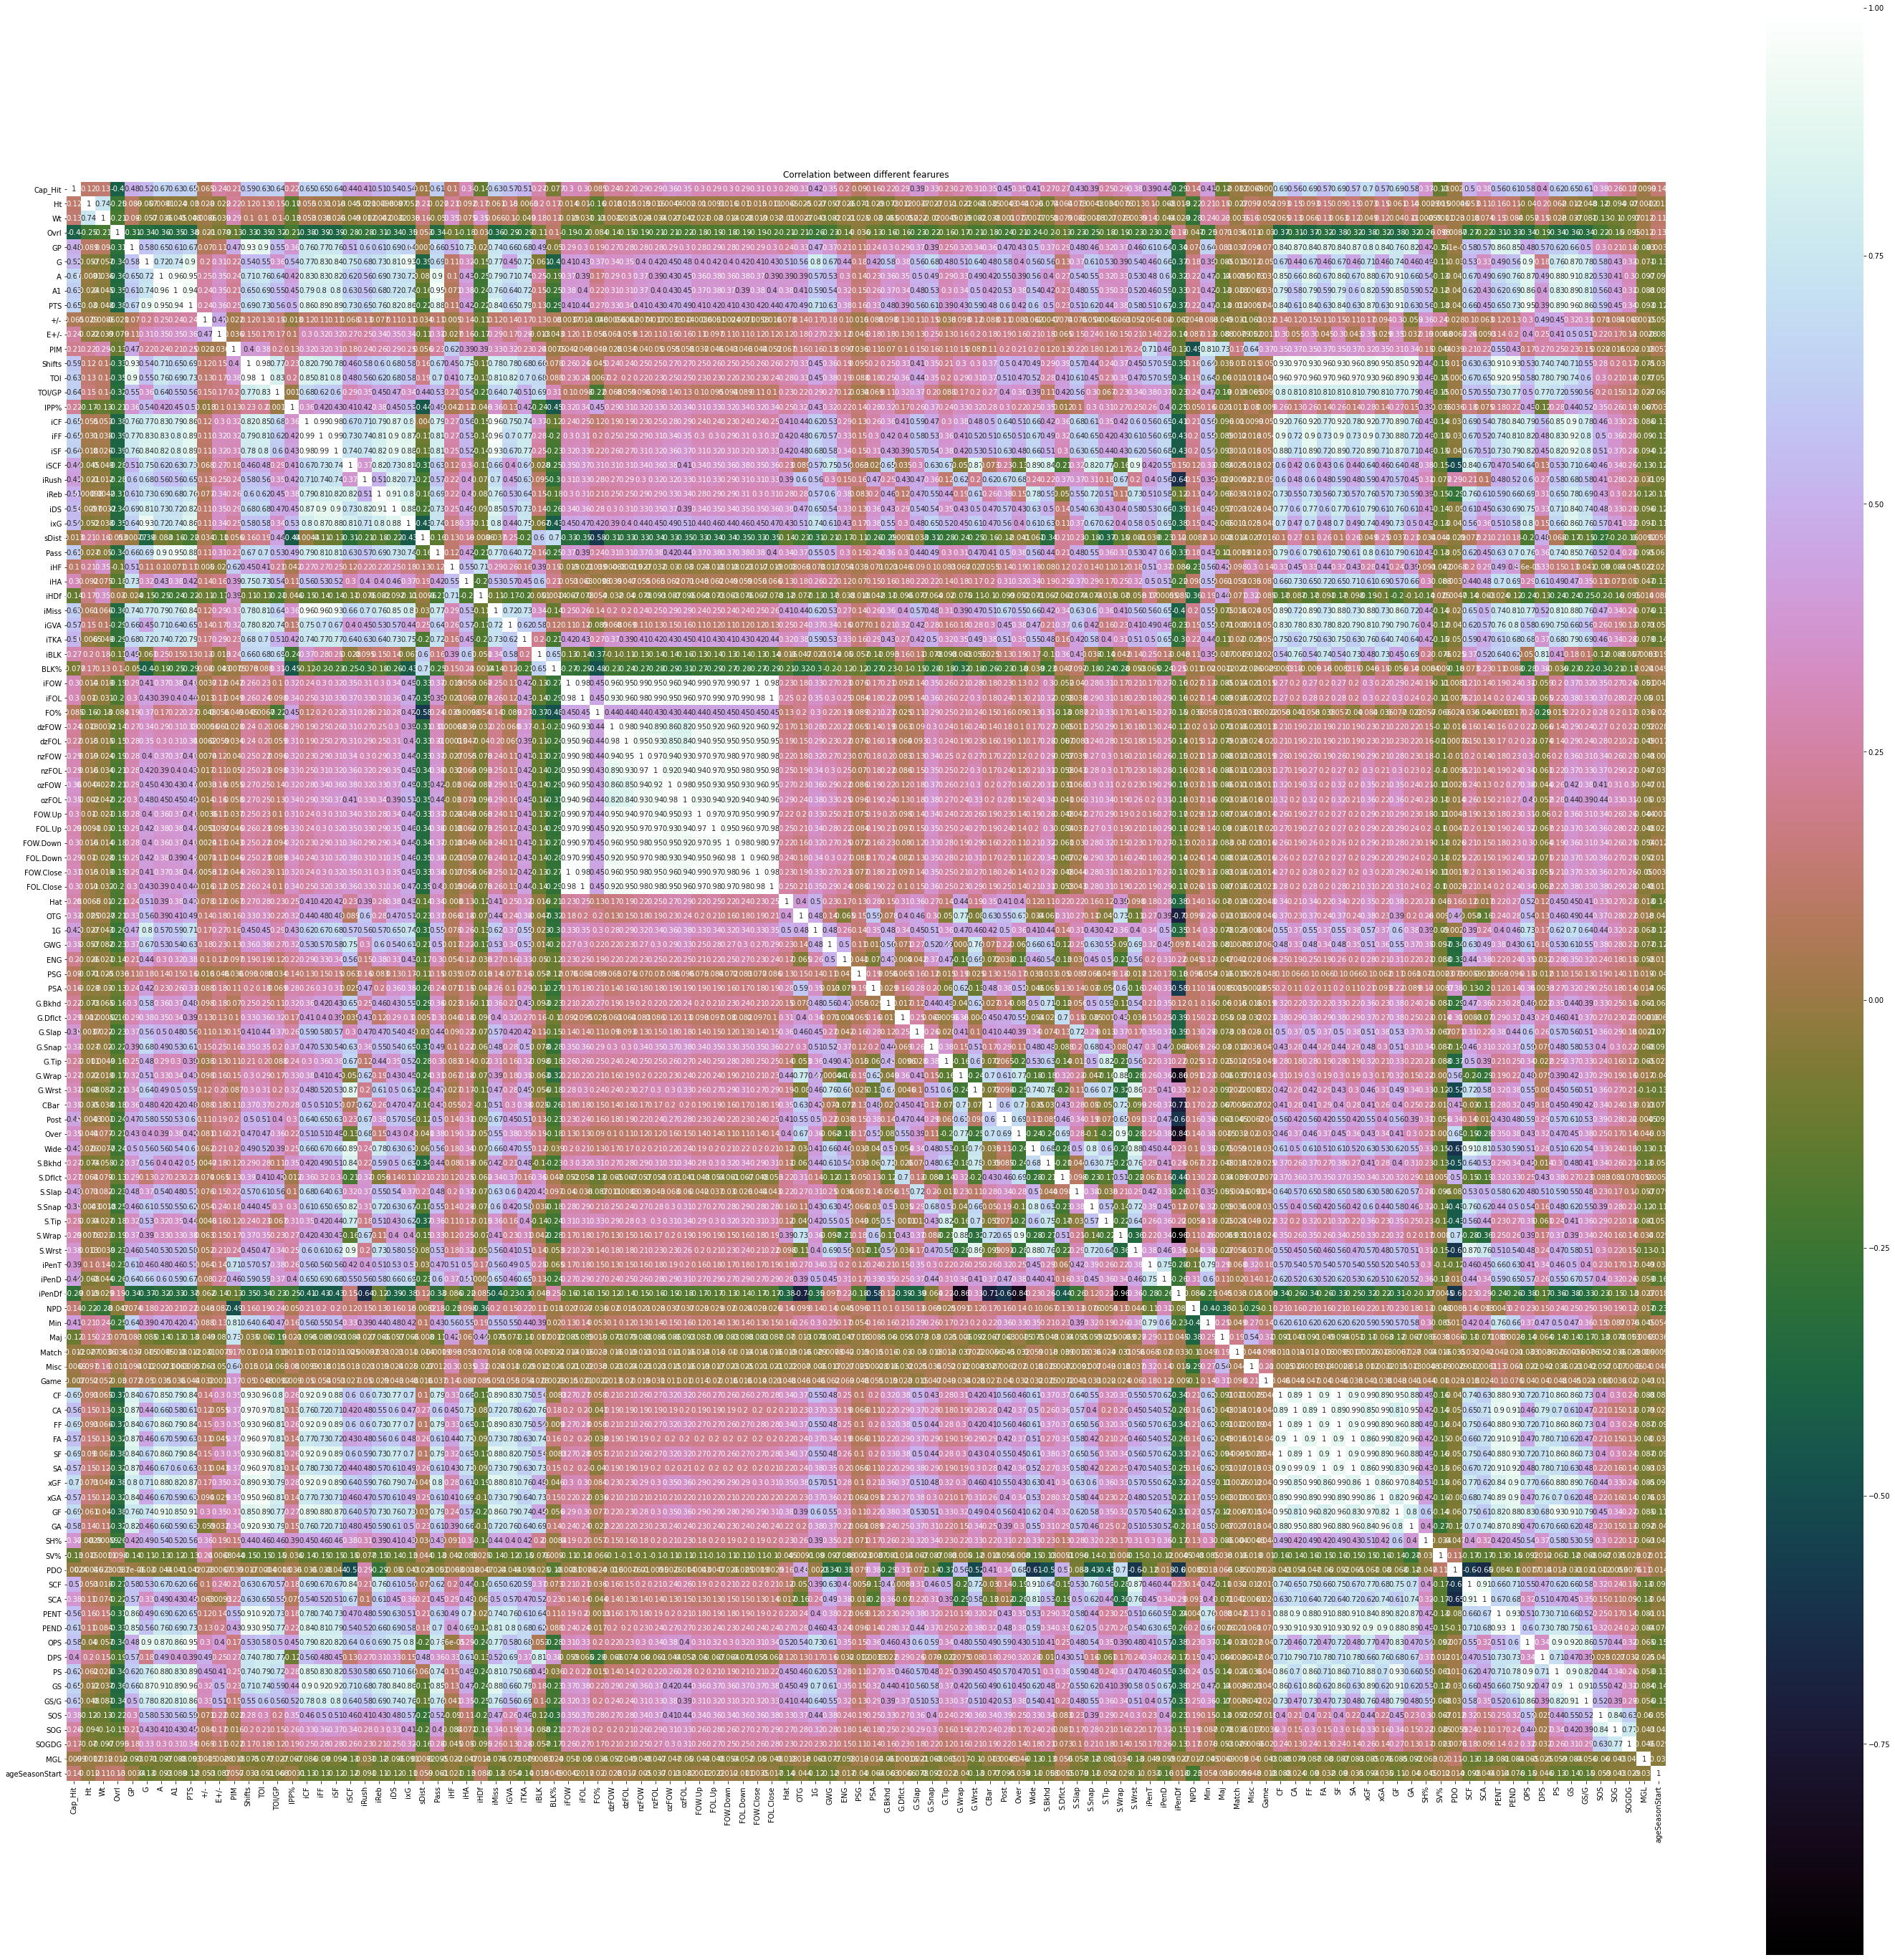

In [ ]:
# Correlation Matrix
correlation = full_data.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

# Standardize Data using StandardScaler

In [ ]:
X_data = full_data.iloc[:, 1:].values
y_data = full_data.iloc[:, 0].values

scaler = StandardScaler()
scaler.fit(X_data)

X_data = scaler.transform(X_data)

# Dimensionality Reduction using PCA

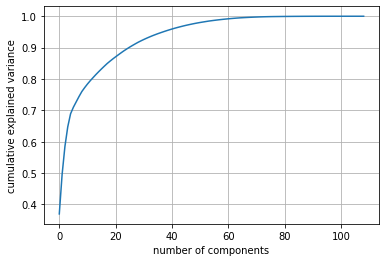

In [ ]:
# Explained Variance
pca = PCA().fit(X_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [ ]:
# Apply PCA
pca = PCA(40).fit(X_data)
X_data_PCA = pca.transform(X_data)
print('Raw Data: ', X_data.shape)
print('After PCA: ', X_data_PCA.shape)

Raw Data:  (1083, 109)
After PCA:  (1083, 40)


# Split into Test/Train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_PCA, y_data, test_size = 0.3)
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(758,) (758, 40) (325,) (325, 40)


# Regression

## Multi-Variable Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
# The mean squared error
CV_scores_LR = cross_val_score(LR, X_data_PCA, y_data, scoring='neg_root_mean_squared_error')
print('Mean squared error from CV: %.9E' % abs(np.mean(CV_scores_LR)))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination from CV: %.9f' % r2_score(y_test, linReg_pred))


Mean squared error from CV: 1.410739410E+06


In [ ]:
# Parameter tuning

parameters_LR = {
    'fit_intercept': ['true','false'],
    }

LR_tuning = LinearRegression()
clf_LR = GridSearchCV(LR_tuning, parameters_LR, scoring='neg_root_mean_squared_error')
clf_LR.fit(X_data_PCA, y_data)
print("Best parameters set found on development set:")
print(clf_LR.best_params_)
print("Grid scores on development set:")
means_LR = clf_LR.cv_results_['mean_test_score']
stds_LR = clf_LR.cv_results_['std_test_score']
for mean, std, params in zip(means_LR, stds_LR, clf_LR.cv_results_['params']):
  print("%0.9f (+/-%0.09f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:
{'fit_intercept': 'true'}
Grid scores on development set:
-1410739.409567220 (+/-89084.820681796) for {'fit_intercept': 'true'}
-1410739.409567220 (+/-89084.820681796) for {'fit_intercept': 'false'}


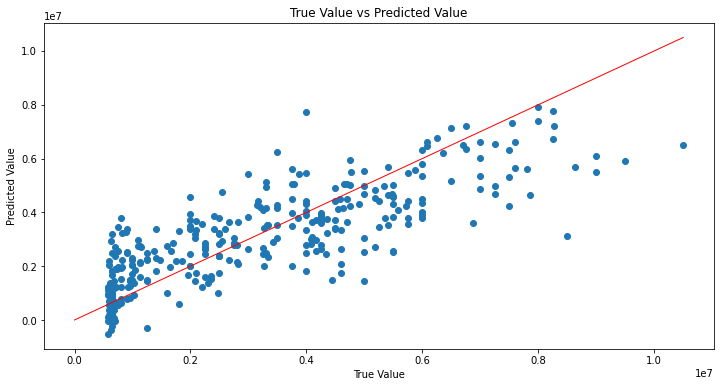

In [ ]:
# Plot outputs
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, LR_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linewidth=1)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')

plt.show()

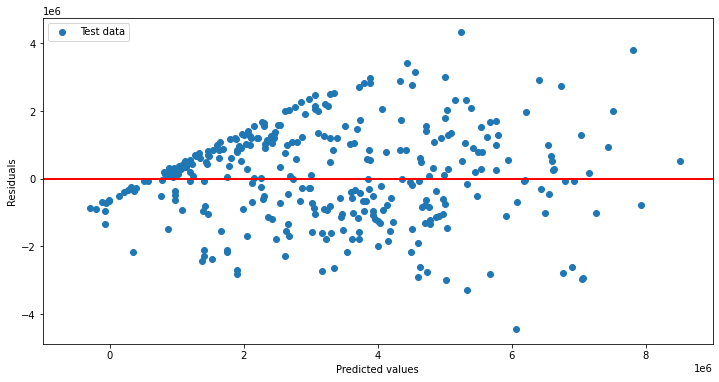

In [ ]:
# Residuals plot
plt.figure(figsize=(12, 6))
plt.scatter(LR_pred, LR_pred - y_test, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1e6, xmax=9e6, lw=2, color='red')
plt.xlim([-1e6,9e6])
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=23, weights='distance')

In [ ]:
# Parameter tuning
parameters_KNN = {
    # 'n_neighbors': list(range(1,100)),
    # 'weights': ['uniform', 'distance'], # uniform best
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # auto best
    }

KNN_tuning = KNeighborsRegressor()
clf_KNN = GridSearchCV(KNN_tuning, parameters_KNN, scoring='neg_root_mean_squared_error')
clf_KNN.fit(X_data_PCA, y_data)
print("Best parameters set found on development set:")
print(clf_KNN.best_params_)
print("Grid scores on development set:")
means_KNN = clf_KNN.cv_results_['mean_test_score']
stds_KNN = clf_KNN.cv_results_['std_test_score']
for mean, std, params in zip(means_KNN, stds_KNN, clf_KNN.cv_results_['params']):
  print("%0.9f (+/-%0.09f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:
{}
Grid scores on development set:
-1676225.313457405 (+/-138215.670331615) for {}


In [ ]:
# The mean squared error
CV_scores_KNN = cross_val_score(KNN, X_data_PCA, y_data, scoring='neg_root_mean_squared_error')
print('Mean squared error from CV: %.9E' % abs(np.mean(CV_scores_KNN)))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination from CV: %.9f' % r2_score(y_test, linReg_pred))

Mean squared error from CV: 1.611396076E+06


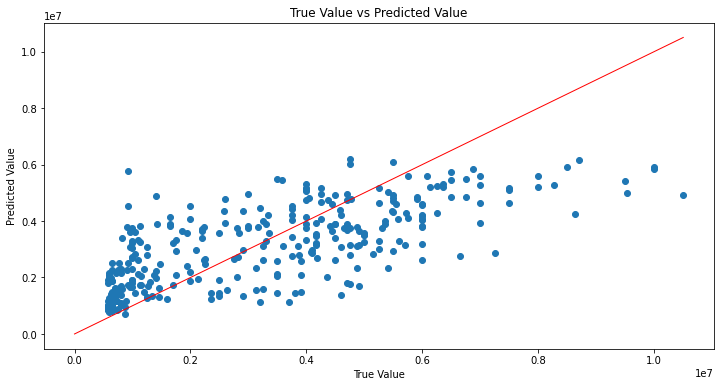

In [ ]:
# Plot outputs
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, KNN_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linewidth=1)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')

plt.show()

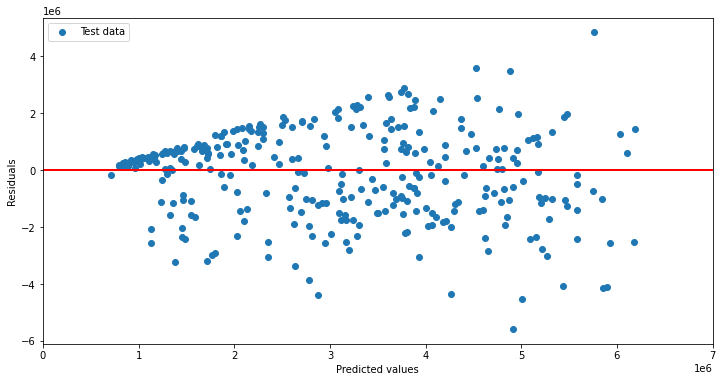

In [ ]:
# Residuals plot
plt.figure(figsize=(12, 6))
plt.scatter(KNN_pred, KNN_pred - y_test, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=7e6, lw=2, color='red')
plt.xlim([0,7e6])
plt.show()

# Decision Trees

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=400, max_depth=11, random_state=0)

In [ ]:
# Parameter tuning

parameters_RF = {
    'n_estimators': [1,10,30,60,100,150,200,400],
    # 'n_estimators': [400],
    'criterion': ['mse', 'mae'],
    'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
    # 'max_depth': [11],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'min_weight_fraction_leaf': [0.0],
    # 'max_features': ['auto'],
    # 'max_leaf_nodes': [None],
    # 'min_impurity_decrease': [0.0],
    # 'min_impurity_split': [None],
    # 'bootstrap': [True],
    # 'oob_score': [False],
    'random_state': [0,1,2,3,4,5,None],
    # 'ccp_alpha': [0.0],
    # 'max_samples': [None],
    }

RF_tuning = RandomForestRegressor()
clf_RF = GridSearchCV(RF_tuning, parameters_RF, scoring='neg_root_mean_squared_error')
clf_RF.fit(X_data_PCA, y_data)
print("Best parameters set found on development set:")
print(clf_RF.best_params_)
print("Grid scores on development set:")
means_RF = clf_RF.cv_results_['mean_test_score']
stds_RF = clf_RF.cv_results_['std_test_score']
for mean, std, params in zip(means_RF, stds_RF, clf_RF.cv_results_['params']):
  print("%0.9f (+/-%0.09f) for %r" % (mean, std * 2, params))

In [ ]:
# The mean squared error
CV_scores_RF = cross_val_score(RF, X_data_PCA, y_data, scoring='neg_root_mean_squared_error')
print('Mean squared error from CV: %.9E' % abs(np.mean(CV_scores_RF)))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination from CV: %.9f' % r2_score(y_test, linReg_pred))

Mean squared error from CV: 1.546912374E+06


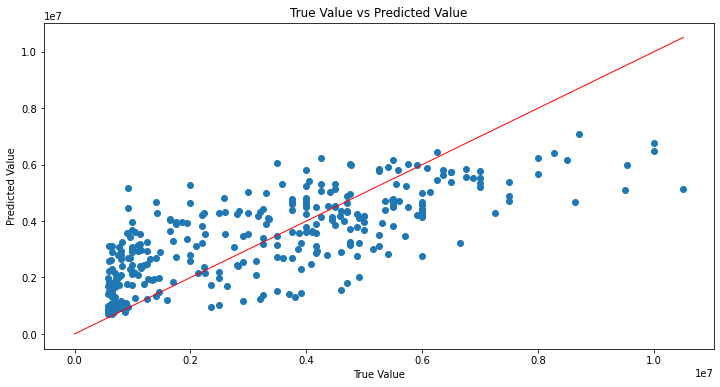

In [ ]:
# Plot outputs
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, RF_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linewidth=1)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')

plt.show()

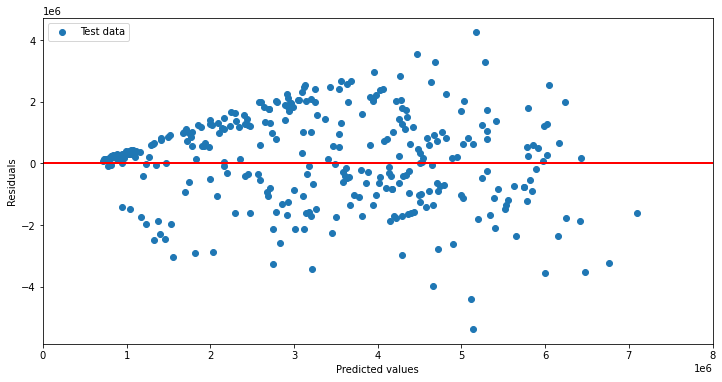

In [ ]:
# Residuals plot
plt.figure(figsize=(12, 6))
plt.scatter(RF_pred, RF_pred - y_test, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=8e6, lw=2, color='red')
plt.xlim([0,8e6])
plt.show()

# Support Vector Machines
## SVR

In [ ]:
from sklearn.svm import SVR
SVR_reg = SVR(kernel='rbf', C=10000000, gamma=0.001)

In [ ]:
# Parameter tuning

parameters_SVR = {
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'kernel': ['linear'],
    'C': [22000],
    }

SVR_tuning = SVR()
clf_SVR = GridSearchCV(SVR_tuning, parameters_SVR, scoring='neg_root_mean_squared_error')
clf_SVR.fit(X_data_PCA, y_data)
print("Best parameters set found on development set:")
print(clf_SVR.best_params_)
print("Grid scores on development set:")
means_SVR = clf_SVR.cv_results_['mean_test_score']
stds_SVR = clf_SVR.cv_results_['std_test_score']
for mean, std, params in zip(means_SVR, stds_SVR, clf_SVR.cv_results_['params']):
  print("%0.9f (+/-%0.09f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:
{'C': 100000, 'gamma': 'scale', 'kernel': 'linear'}
Grid scores on development set:
-1404464.972713863 (+/-94822.478654304) for {'C': 100000, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# The mean squared error
CV_scores_SVR = cross_val_score(SVR_reg, X_data_PCA, y_data, scoring='neg_root_mean_squared_error')
print('Mean squared error from CV: %.9E' % abs(np.mean(CV_scores_SVR)))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination from CV: %.9f' % r2_score(y_test, linReg_pred))

Mean squared error from CV: 1.410817099E+06


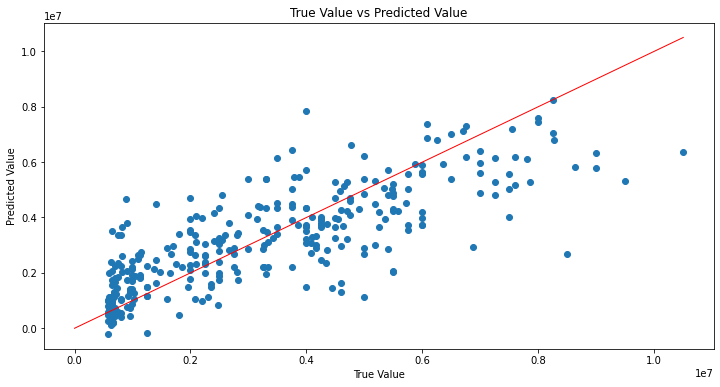

In [ ]:
# Plot outputs
SVR_reg.fit(X_train, y_train)
SVR_pred = SVR_reg.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, SVR_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linewidth=1)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')

plt.show()

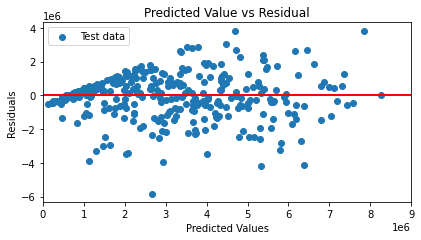

In [ ]:
# Residuals plot
plt.figure(figsize=(6.6,3.3))
plt.scatter(SVR_pred, SVR_pred - y_test, label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Value vs Residual')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1e6, xmax=9e6, lw=2, color='red')
plt.xlim([0,9e6])
plt.show()